In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
a, b = (1, 2)
a

1

In [ ]:
b

2

In [ ]:
A = np.arange(9).reshape(3,3)
X, B = np.shape(A)
X

3

In [ ]:
class GradientDescent(object):
    def __init__(self, learning_rate=0.01, max_iter=1000, **kwargs):
        """
        [hyper_parameter]
        learning_rage: 학습률
        max_iter: 반복 최대치
        
        kwargs: 재사용을 위해 선언만.
        """
        self._learning_rate = learning_rate
        self.W_ = None
        self.max_iter = max_iter
        
    def fit(self, X_data, y_data):
        # 시각화 위함(우리의 공부를 위함)
        self.weight_list_ = []
        self.gradient_list_ = []
        
        # X [[1], [2], [3], ...] 

        num_sample, num_col = np.shape(X_data)
        # Beta(Theta) 추가
        # self.W_ = np.ones(num_col + 1) #Beta_n,... Beta1, Beta0
        # H(x) = W1*X + W0
        # H(X) = W1*X + 1*W0
        self.W_ = np.random.random(size=(num_col+1))
        
        X_data = np.c_[X_data, np.ones(num_sample)]
        X_data_T = X_data.T

        for i in range(self.max_iter):
            # 실제값과 예측값의 차이 (err)
            err = np.dot(X_data, self.W_) - y_data

            # err 이용하여 cost 생성 : 오차의 제곱합 / 2 * 데이터 개수
            # RMSE
            cost = np.sum(err ** 2) / (2 * num_sample)

            # transposed X * cost / n
            # cost = np.sum((WX-y) ** 2)
            
            # np,sum((WX-y))
            # (WX-y)X

            # [[X1, X2, X3, ...]
            # [1, 1, 1, ...]]
            # .dot(y)
            # d(cost)/d(w)

            #  w - learning_rate*()
            gradient = np.dot(X_data_T, err) / num_sample
            
            
            # y = WX
            # np.sum(WX) / N
            gradient = np.dot(X_data_T)

            # Weight 업데이트
            self.W_ = self.W_ - (self._learning_rate * gradient)

            
            self.gradient_list_.append(gradient)
            self.weight_list_.append(self.W_)
        return self
    
    def predict(self, X_data):
        num_sample, num_col = np.shape(X_data)
        X_data = np.c_[X_data, np.ones(num_sample)]
        return np.dot(X_data, self.W_)

In [ ]:
X = np.linspace(1, 30, 50)
y = X * 3 + np.random.normal(size=(X.shape[0])) * 6
X = X.reshape(-1, 1)
# X
# 데이터가 준비 됐다.

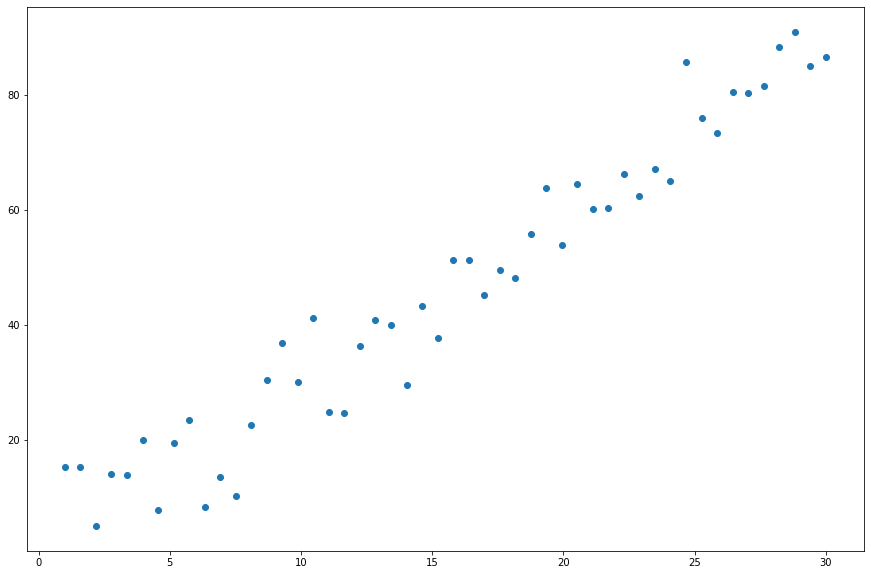

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(X.flatten(), y)

In [80]:
# Gradiend Descent
gd  =  GradientDescent(max_iter=100, learning_rate=0.001)
gd.fit(X, y )

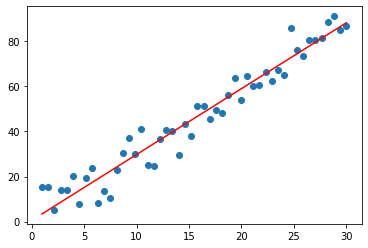

In [81]:
plt.scatter(X, y)
plt.plot(X, gd.predict(X), 'r-')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the futur

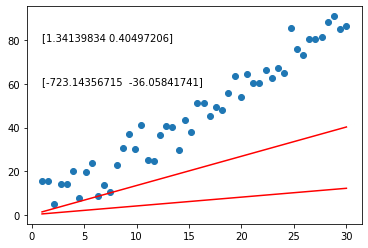

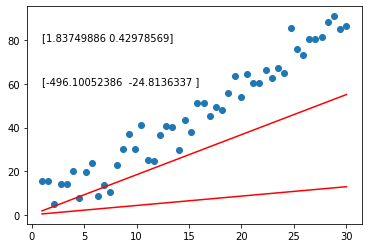

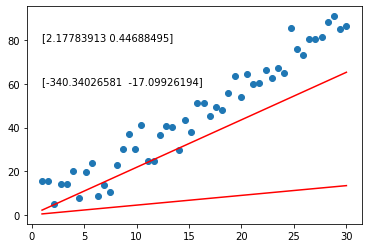

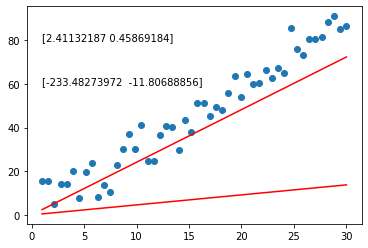

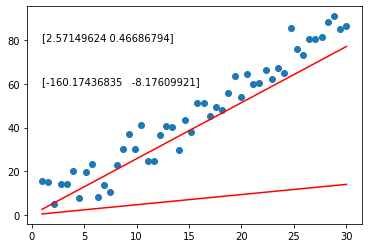

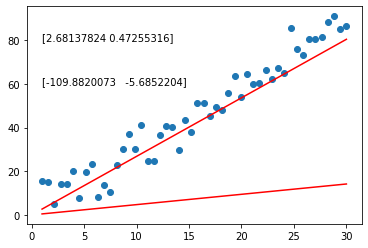

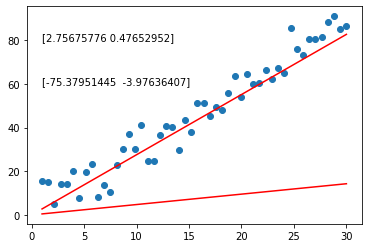

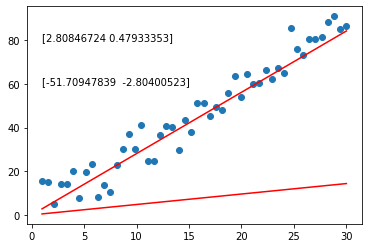

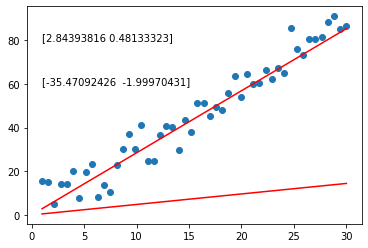

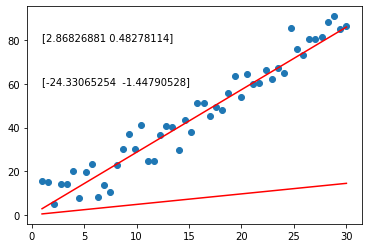

In [82]:
import time
for W, G in zip(gd.weight_list_[:10], gd.gradient_list_[:10]):
    # plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(X, y)
    plt.plot(X, X.dot(W.reshape(X.shape[1], -1)), 'r-')
    plt.text(1, 80, W)
    plt.text(1, 60, G) 
    # time.sleep(1)

